In [1]:
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex
import pandas as pd
import numpy as np
import json
import os

## Experiments and Functions

In [3]:
sim_metrics_list = ['Euclidean', 'SoftCosine', 'WMD', 'Relax-WMD']

In [11]:
experiments = [
            {'id': '1', 'source':'imdb', 'target':'uwcse', 'predicate':'workedunder', 'to_predicate':'advisedby', 'arity': 2},
            #{'id': '2', 'source':'uwcse', 'target':'imdb', 'predicate':'advisedby', 'to_predicate':'workedunder', 'arity': 2},
            {'id': '3', 'source':'imdb', 'target':'cora', 'predicate':'workedunder', 'to_predicate':'samevenue', 'arity': 2},
            #{'id': '4', 'source':'cora', 'target':'imdb', 'predicate':'samevenue', 'to_predicate':'workedunder', 'arity': 2},
            ##{'id': '5', 'source':'cora', 'target':'imdb', 'predicate':'sametitle', 'to_predicate':'workedunder', 'arity': 2},
            ##{'id': '6', 'source':'imdb', 'target':'cora', 'predicate':'workedunder', 'to_predicate':'sametitle', 'arity': 2},
            ##{'id': '5', 'source':'uwcse', 'target':'cora', 'predicate':'advisedby', 'to_predicate':'samevenue', 'arity': 2},
            ##{'id': '6', 'source':'cora', 'target':'uwcse', 'predicate':'samevenue', 'to_predicate':'advisedby', 'arity': 2},
            {'id': '7', 'source':'yeast', 'target':'twitter', 'predicate':'proteinclass', 'to_predicate':'accounttype', 'arity': 2},
            {'id': '8', 'source':'twitter', 'target':'yeast', 'predicate':'accounttype', 'to_predicate':'proteinclass', 'arity': 2},
            {'id': '9', 'source':'nell_sports', 'target':'nell_finances', 'predicate':'teamplayssport', 'to_predicate':'companyeconomicsector', 'arity': 2},
            {'id': '10', 'source':'nell_finances', 'target':'nell_sports', 'predicate':'companyeconomicsector', 'to_predicate':'teamplayssport', 'arity': 2},
]

In [4]:
def load_data(experiments, metric, directory):
    data = {}
    for item in experiments:
        experiment_title = item['id'] + '_' + item['source'] + '_' + item['target']
        
        if(metric != ''):
            file_path = os.getcwd() + directory + experiment_title + '/' + experiment_title + '_fasttext_{}.json'.format(metric)
        elif 'rdn-b' in directory:
            file_path = os.getcwd() + directory + experiment_title + '/rdnb.json' 
        elif 'treeboostler' in directory and item['id'] != '10':
            file_path = os.getcwd() + directory + experiment_title + '/' + experiment_title + '.json'
            
        try:
            with open(file_path, 'r') as fp:
                results = json.load(fp)

                data[experiment_title] = results
        except:
            continue
    return data

In [5]:
if not os.path.exists('learning_curves'):
    os.makedirs('learning_curves')
    os.makedirs('learning_curves/deep')
    os.makedirs('learning_curves/deep/AUC_ROC')
    os.makedirs('learning_curves/deep/AUC_PR')
    os.makedirs('learning_curves/most_similar')
    os.makedirs('learning_curves/most_similar/AUC_ROC')
    os.makedirs('learning_curves/most_similar/AUC_PR')

## Estudo do Uso de Stopwords

### Depth-First Mapping

In [6]:
# Setting paths parameters
mapping_order = 'comites'
k = 2

compare_stopwords = False

#Removing Yeast and Twitter pair of experiments because there is no stopwords in predicates
#exp = experiments.copy()
#exp.remove({'id': '7', 'source':'yeast', 'target':'twitter', 'predicate':'proteinclass', 'to_predicate':'accounttype', 'arity': 2})
#exp.remove({'id': '8', 'source':'twitter', 'target':'yeast', 'predicate':'accounttype', 'to_predicate':'proteinclass', 'arity': 2})

# Results for AUC ROC

# Dataset 1_imdb_uwcse

<ipython-input-14-49b1cbba42d1>:93: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "D-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, tree, 'D-', linestyle='dotted', color='darkred', label='TreeBoostler')
<ipython-input-14-49b1cbba42d1>:94: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "8-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, rdn_b_p, '8-', linestyle='dotted', color='black', label='RDN-B')
<ipython-input-14-49b1cbba42d1>:101: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "X-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot(t, majority_stopwords, 'X-', linestyle='--', color='darkcyan', label='Majority Voting')
<ipython-input-14-49b1cbba42d1>:102: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and t

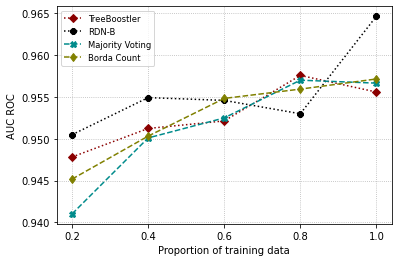

# Dataset 3_imdb_cora

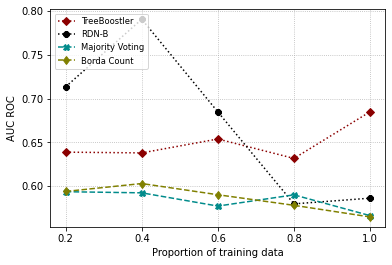

# Dataset 7_yeast_twitter

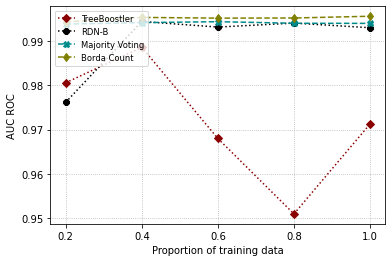

# Dataset 8_twitter_yeast

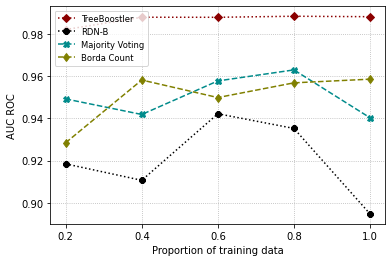

# Dataset 9_nell_sports_nell_finances

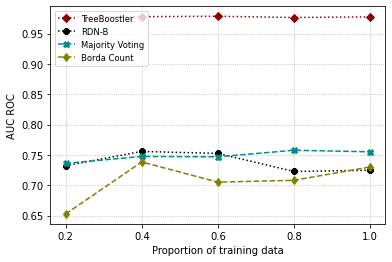

# Dataset 10_nell_finances_nell_sports

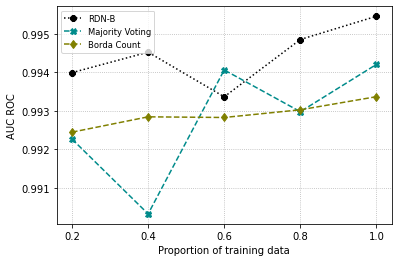

# Results for AUC PR

# Dataset 1_imdb_uwcse

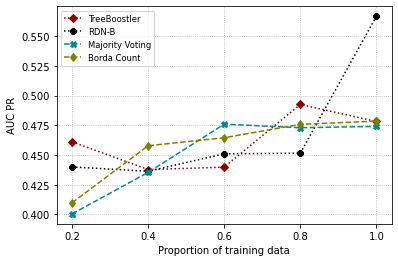

# Dataset 3_imdb_cora

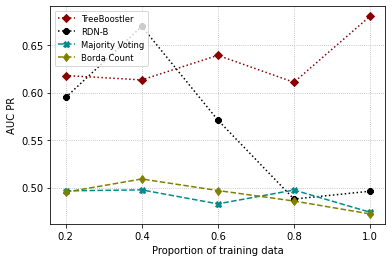

# Dataset 7_yeast_twitter

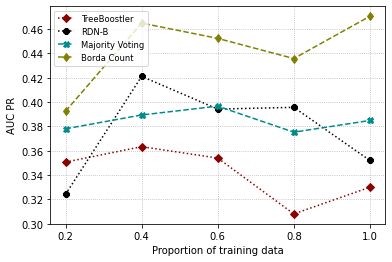

# Dataset 8_twitter_yeast

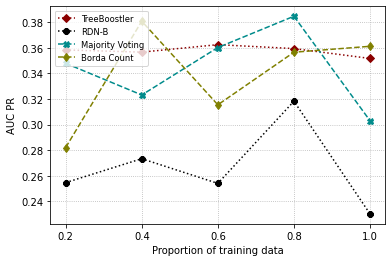

# Dataset 9_nell_sports_nell_finances

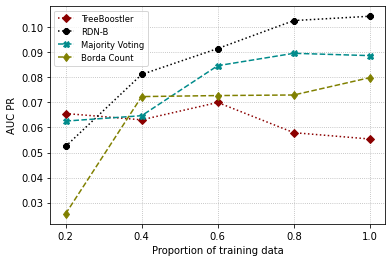

# Dataset 10_nell_finances_nell_sports

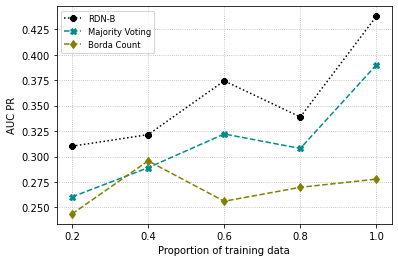

In [14]:
# Using stopwords
path = f'/results/curves/{mapping_order}/'
#data_softcosine_stopwords = load_data(experiments, 'softcosine', path)
#data_euclidean_stopwords = load_data(experiments, 'euclidean', path)
#data_wmd_stopwords = load_data(experiments, 'wmd', path)
#data_rwmd_stopwords = load_data(experiments, 'relax-wmd', path)

data_majority_stopwords = load_data(experiments, 'majority_vote', path)
data_borda_stopwords = load_data(experiments, 'borda_count', path)

if compare_stopwords:
    # Removing stopwords
    path = f'/results/curves/{mapping_order}/no_stopwords/k_{k}/'
    data_softcosine_no_stopwords = load_data(experiments, 'softcosine', path)
    data_euclidean_no_stopwords = load_data(experiments, 'euclidean', path)
    data_wmd_no_stopwords = load_data(experiments, 'wmd', path)
    data_rwmd_no_stopwords = load_data(experiments, 'relax-wmd', path)

baseline_path = f'/results/baselines/curves/'
treeboostler_data = load_data(experiments, '', baseline_path + 'treeboostler/')
rdnb_data = load_data(experiments, '', baseline_path + 'rdn-b/')

for metric in ['AUC ROC', 'AUC PR']:
    display(Markdown('# Results for ' + metric))
    table = []
    for j in range(len(experiments)):
        dataset = experiments[j]['id'] + '_' + experiments[j]['source'] + '_' + experiments[j]['target']
        if dataset in data_majority_stopwords:

            softcosine_stopwords, softcosine_no_stopwords = [], []
            euclidean_stopwords, euclidean_no_stopwords = [], []
            wmd_stopwords, wmd_no_stopwords = [], []
            relax_wmd_stopwords, relax_wmd_no_stopwords = [], []
            majority_stopwords, borda_stopwords = [], []
            
            tree = []
            rdn_b_p = []
            for amount in [0.2, 0.4, 0.6, 0.8, 1.0]:
                mapping_time = ''
                results_using_stopwords = {}
                results_removing_stopwords = {}
                
                if(experiments[j]['id'] != '10'):
                    treeboostler = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in treeboostler_data[str(dataset)]])
                
                # Using stopwords
                #results_using_stopwords['softcosine'] = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_softcosine_stopwords[str(dataset)]])
                #results_using_stopwords['euclidean'] = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_euclidean_stopwords[str(dataset)]])
                #results_using_stopwords['wmd'] = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_wmd_stopwords[str(dataset)]])
                #results_using_stopwords['rwmd'] = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_rwmd_stopwords[str(dataset)]])

                results_using_stopwords['majority_vote'] = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_majority_stopwords[str(dataset)]])
                results_using_stopwords['borda_count'] = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_borda_stopwords[str(dataset)]])

                if compare_stopwords:
                    #Removing stopwords
                    results_removing_stopwords['softcosine'] = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_softcosine_no_stopwords[str(dataset)]])
                    results_removing_stopwords['euclidean'] = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_euclidean_no_stopwords[str(dataset)]])
                    results_removing_stopwords['wmd'] = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_wmd_no_stopwords[str(dataset)]])
                    results_removing_stopwords['rwmd'] = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_rwmd_no_stopwords[str(dataset)]])
                
                if(experiments[j]['id'] != '10'):
                    rdnb = np.array([(np.array([item['amount_'+str(amount)][metric] for item in sublist])).mean() for sublist in rdnb_data[str(dataset)]])
                else:
                    rdnb = np.array([(np.array([item['rdn_b_'+str(amount)][metric] for item in sublist])).mean() for sublist in rdnb_data[str(dataset)]])
                
                if(experiments[j]['id'] != '10'):
                    tree.append(treeboostler.mean())
                
                #softcosine_stopwords.append(results_using_stopwords['softcosine'].mean())
                #euclidean_stopwords.append(results_using_stopwords['euclidean'].mean())
                #wmd_stopwords.append(results_using_stopwords['wmd'].mean())
                #relax_wmd_stopwords.append(results_using_stopwords['rwmd'].mean())
                
                majority_stopwords.append(results_using_stopwords['majority_vote'].mean())
                borda_stopwords.append(results_using_stopwords['borda_count'].mean())

                if compare_stopwords:
                    softcosine_no_stopwords.append(results_removing_stopwords['softcosine'].mean())
                    euclidean_no_stopwords.append(results_removing_stopwords['euclidean'].mean())
                    wmd_no_stopwords.append(results_removing_stopwords['wmd'].mean())
                    relax_wmd_no_stopwords.append(results_removing_stopwords['rwmd'].mean())

                rdn_b_p.append(rdnb.mean())
            
            t = [0.2, 0.4, 0.6, 0.8, 1.0]
            display(Markdown(f'# Dataset {dataset}'))

            fig, ax = plt.subplots()

            #Baselines
            if(experiments[j]['id'] != '10'):
                ax.plot(t, tree, 'D-', linestyle='dotted', color='darkred', label='TreeBoostler')
            ax.plot(t, rdn_b_p, '8-', linestyle='dotted', color='black', label='RDN-B')

            #ax.plot(t, euclidean_stopwords, 's-', linestyle='--', color='darkblue', label='Euclidean')
            #ax.plot(t, softcosine_stopwords, '^-', linestyle='--', color='darkgreen', label='Soft Cosine')
            #ax.plot(t, wmd_stopwords, 'x-', linestyle='--', color='darkgoldenrod', label='WMD')
            #ax.plot(t, relax_wmd_stopwords, 'X-', linestyle='--', color='darkcyan', label='Relax-WMD')
            
            ax.plot(t, majority_stopwords, 'X-', linestyle='--', color='darkcyan', label='Majority Voting')
            ax.plot(t, borda_stopwords, 'd-', linestyle='--', color='olive', label='Borda Count')
            
            if compare_stopwords:
                ax.plot(t, euclidean, 's-', linestyle='--', color='b', label='Euclidean No Stopwords')
                ax.plot(t, softcosine, 's-', linestyle='--', color='r', label='SoftCosine No Stopwords')
                ax.plot(t, wmd, 'x-', linestyle='--', color='g', label='WMD No Stopwords')
                ax.plot(t, relax_wmd, 'x-', linestyle='--', color='m', label='Relax-WMD No Stopwords')


            ax.set(xlabel='Proportion of training data', ylabel=metric)
            ax.grid(linestyle = ':')
            ax.legend(loc='upper left', fontsize='small', frameon=True)
            plt.xticks(t,t)
            plt.show()

            #plt.show()
            metric_name = '_'.join(metric.split())
            #fig.savefig(f'learning_curves/{mapping_order}/{metric_name}/{dataset}.pdf', bbox_inches='tight')
            #fig.savefig("learning_curves/{}_{}.pdf".format(dataset, ))

### Ranked-First Mapping

In [14]:
# Setting paths parameters
mapping_order = 'most_similar'
k = '2'
#method = f'k_{k}/'
#method='hungaro/'

compare_stopwords = False

#Removing Yeast and Twitter pair of experiments because there is no stopwords in predicates
#exp = experiments.copy()
#exp.remove({'id': '7', 'source':'yeast', 'target':'twitter', 'predicate':'proteinclass', 'to_predicate':'accounttype', 'arity': 2})
#exp.remove({'id': '8', 'source':'twitter', 'target':'yeast', 'predicate':'accounttype', 'to_predicate':'proteinclass', 'arity': 2})

In [15]:
# Using stopwords
path = f'/results/curves/{mapping_order}/w_stopwords/k_{k}/'
data_softcosine_stopwords = load_data(experiments, 'softcosine', path)
data_euclidean_stopwords = load_data(experiments, 'euclidean', path)
data_wmd_stopwords = load_data(experiments, 'wmd', path)
data_rwmd_stopwords = load_data(experiments, 'relax-wmd', path)

if compare_stopwords:
    # Removing stopwords
    path = f'/results/curves/{mapping_order}/no_stopwords/k_{k}/'
    data_softcosine_no_stopwords = load_data(experiments, 'softcosine', path)
    data_euclidean_no_stopwords = load_data(experiments, 'euclidean', path)
    data_wmd_no_stopwords = load_data(experiments, 'wmd', path)
    data_rwmd_no_stopwords = load_data(experiments, 'relax-wmd', path)

baseline_path = f'/results/baselines/curves/'
treeboostler_data = load_data(experiments, '', baseline_path + 'treeboostler/')
rdnb_data = load_data(experiments, '', baseline_path + 'rdn-b/')

for metric in ['AUC ROC', 'AUC PR']:
    display(Markdown('# Results for ' + metric))
    table = []
    for j in range(len(experiments)):
        dataset = experiments[j]['id'] + '_' + experiments[j]['source'] + '_' + experiments[j]['target']
        if dataset in data_euclidean_stopwords:

            softcosine_stopwords, softcosine_no_stopwords = [], []
            euclidean_stopwords, euclidean_no_stopwords = [], []
            wmd_stopwords, wmd_no_stopwords = [], []
            relax_wmd_stopwords, relax_wmd_no_stopwords = [], []
            
            tree = []
            rdn_b_p = []
            for amount in [0.2, 0.4, 0.6, 0.8, 1.0]:
                mapping_time = ''
                results_using_stopwords = {}
                results_removing_stopwords = {}
                
                if(experiments[j]['id'] != '10'):
                    treeboostler = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in treeboostler_data[str(dataset)]])
                
                # Using stopwords
                results_using_stopwords['softcosine'] = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_softcosine_stopwords[str(dataset)]])
                results_using_stopwords['euclidean'] = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_euclidean_stopwords[str(dataset)]])
                results_using_stopwords['wmd'] = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_wmd_stopwords[str(dataset)]])
                results_using_stopwords['rwmd'] = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_rwmd_stopwords[str(dataset)]])

                if compare_stopwords:
                    #Removing stopwords
                    results_removing_stopwords['softcosine'] = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_softcosine_no_stopwords[str(dataset)]])
                    results_removing_stopwords['euclidean'] = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_euclidean_no_stopwords[str(dataset)]])
                    results_removing_stopwords['wmd'] = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_wmd_no_stopwords[str(dataset)]])
                    results_removing_stopwords['rwmd'] = np.array([(np.array([item['transfer_'+str(amount)][metric] for item in sublist])).mean() for sublist in data_rwmd_no_stopwords[str(dataset)]])
                
                if(experiments[j]['id'] != '10'):
                    rdnb = np.array([(np.array([item['amount_'+str(amount)][metric] for item in sublist])).mean() for sublist in rdnb_data[str(dataset)]])
                else:
                    rdnb = np.array([(np.array([item['rdn_b_'+str(amount)][metric] for item in sublist])).mean() for sublist in rdnb_data[str(dataset)]])
                
                if(experiments[j]['id'] != '10'):
                    tree.append(treeboostler.mean())
                
                softcosine_stopwords.append(results_using_stopwords['softcosine'].mean())
                euclidean_stopwords.append(results_using_stopwords['euclidean'].mean())
                wmd_stopwords.append(results_using_stopwords['wmd'].mean())
                relax_wmd_stopwords.append(results_using_stopwords['rwmd'].mean())

                if compare_stopwords:
                    softcosine_no_stopwords.append(results_removing_stopwords['softcosine'].mean())
                    euclidean_no_stopwords.append(results_removing_stopwords['euclidean'].mean())
                    wmd_no_stopwords.append(results_removing_stopwords['wmd'].mean())
                    relax_wmd_no_stopwords.append(results_removing_stopwords['rwmd'].mean())

                rdn_b_p.append(rdnb.mean())
            
            t = [0.2, 0.4, 0.6, 0.8, 1.0]
            display(Markdown(f'# Dataset {dataset}'))

            fig, ax = plt.subplots()

            #Baselines
            if(experiments[j]['id'] != '10'):
                ax.plot(t, tree, 'D-', linestyle='dotted', color='darkred', label='TreeBoostler')
            ax.plot(t, rdn_b_p, '8-', linestyle='dotted', color='black', label='RDN-B')

            ax.plot(t, euclidean_stopwords, 's-', linestyle='--', color='darkblue', label='Euclidean')
            ax.plot(t, softcosine_stopwords, '^-', linestyle='--', color='darkgreen', label='Soft Cosine')
            ax.plot(t, wmd_stopwords, 'x-', linestyle='--', color='darkgoldenrod', label='WMD')
            ax.plot(t, relax_wmd_stopwords, 'X-', linestyle='--', color='darkcyan', label='Relax-WMD')
            
            if compare_stopwords:
                ax.plot(t, euclidean, 's-', linestyle='--', color='b', label='Euclidean No Stopwords')
                ax.plot(t, softcosine, 's-', linestyle='--', color='r', label='SoftCosine No Stopwords')
                ax.plot(t, wmd, 'x-', linestyle='--', color='g', label='WMD No Stopwords')
                ax.plot(t, relax_wmd, 'x-', linestyle='--', color='m', label='Relax-WMD No Stopwords')


            ax.set(xlabel='Proportion of training data', ylabel=metric)
            ax.grid(linestyle = ':')
            ax.legend(loc='upper left', fontsize='small', frameon=True)
            plt.xticks(t,t)
            plt.show()

            #plt.show()
            metric_name = '_'.join(metric.split())
            fig.savefig(f'learning_curves/{mapping_order}/{metric_name}/{dataset}.pdf', bbox_inches='tight')
            #fig.savefig("learning_curves/{}_{}.pdf".format(dataset, ))

# Results for AUC ROC

# Results for AUC PR